In [40]:
import cv2

import matplotlib.pyplot as plt

(-0.5, 199.5, 199.5, -0.5)

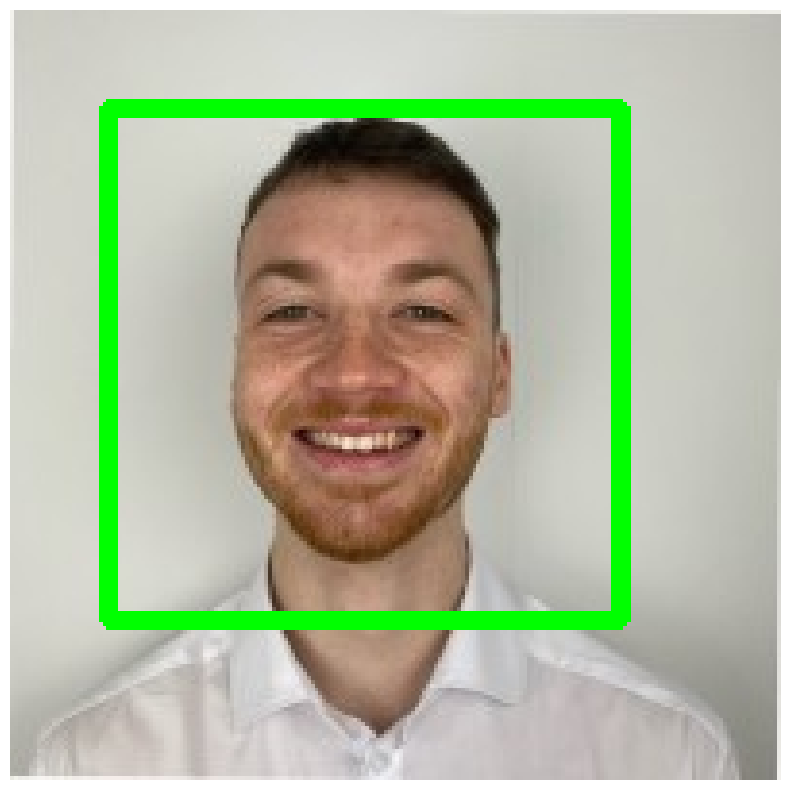

In [48]:
# Load the image
image_path = "../Images/test.jpg"
img = cv2.imread(image_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the classifier
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

faces = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

# Padding of the bounding box
padding = 0.2

for (x, y, w, h) in faces:
    # Increase bounding box
    x_pad = int(padding * w)
    y_pad = int(padding * h)

    x_new = max(x - x_pad, 0)
    y_new = max(y - y_pad, 0)
    w_new = min(w + 2 * x_pad, img.shape[1] - x_new)
    h_new = min(h + 2 * y_pad, img.shape[0] - y_new)
    
    face_cropped = img[y_new:y_new + h_new, x_new:x_new + w_new]
    cv2.imwrite("test_resized.jpg", face_cropped)

    # Draw the rectangle in the image
    cv2.rectangle(img, (x_new, y_new), (x_new + w_new, y_new + h_new), (0, 255, 0), 4)
 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')